<a href="https://colab.research.google.com/github/vatsbalar22/stock-prediction-DL/blob/main/colab_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model train with Deep Learnig

# Data extract through API

In [5]:
from alpha_vantage.timeseries import TimeSeries
api_key = 'RDW63LUED9U3S55M'
symbol = 'RELIANCE.BSE'

def get_stock_data(symbol, api_key):
    ts = TimeSeries(key=api_key, output_format='pandas')
    data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')
    return data
def prepare_data(data):
    data = data[['1. open', '2. high', '3. low', '4. close', '5. volume']]
    data.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    return data

data = get_stock_data(symbol,api_key)
df = prepare_data(data)



In [6]:
df =df.reset_index()
df


,date,Open,High,Low,Close,Volume
0,2024-02-08,2895.6001,2919.7500,2856.7000,2902.9500,98849.0
1,2024-02-07,2870.0000,2898.0000,2858.4500,2883.3999,320512.0
2,2024-02-06,2887.3999,2887.3999,2840.8000,2856.8000,115081.0
3,2024-02-05,2921.2000,2940.0000,2864.0000,2877.0500,128072.0
4,2024-02-02,2864.4500,2949.8999,2864.4500,2914.7500,653622.0
...,...,...,...,...,...,...
4703,2005-01-07,359.8269,373.1159,359.5202,368.5840,16969845.0
4704,2005-01-06,357.7824,365.6195,356.1468,358.4297,13446517.0
4705,2005-01-05,358.1230,363.9158,351.8194,361.1217,16954266.0
4706,2005-01-04,364.5972,371.3782,360.8491,361.7351,10059943.0


In [7]:
# Assuming 'df' is your DataFrame containing the stock data

# Add a new column 'Market_High_Indicator' to indicate if the market high was reached
df['Market_High_Indicator'] = (df['High'] > df['Close'].shift(1)).astype(int)

# Display the DataFrame with the new column
print(df)


           date       Open       High        Low      Close      Volume  \
0    2024-02-08  2895.6001  2919.7500  2856.7000  2902.9500     98849.0   
1    2024-02-07  2870.0000  2898.0000  2858.4500  2883.3999    320512.0   
2    2024-02-06  2887.3999  2887.3999  2840.8000  2856.8000    115081.0   
3    2024-02-05  2921.2000  2940.0000  2864.0000  2877.0500    128072.0   
4    2024-02-02  2864.4500  2949.8999  2864.4500  2914.7500    653622.0   
...         ...        ...        ...        ...        ...         ...   
4703 2005-01-07   359.8269   373.1159   359.5202   368.5840  16969845.0   
4704 2005-01-06   357.7824   365.6195   356.1468   358.4297  13446517.0   
4705 2005-01-05   358.1230   363.9158   351.8194   361.1217  16954266.0   
4706 2005-01-04   364.5972   371.3782   360.8491   361.7351  10059943.0   
4707 2005-01-03   354.4090   371.0715   354.4090   370.1173  11842921.0   

      Market_High_Indicator  
0                         0  
1                         0  
2        

#Data visualization

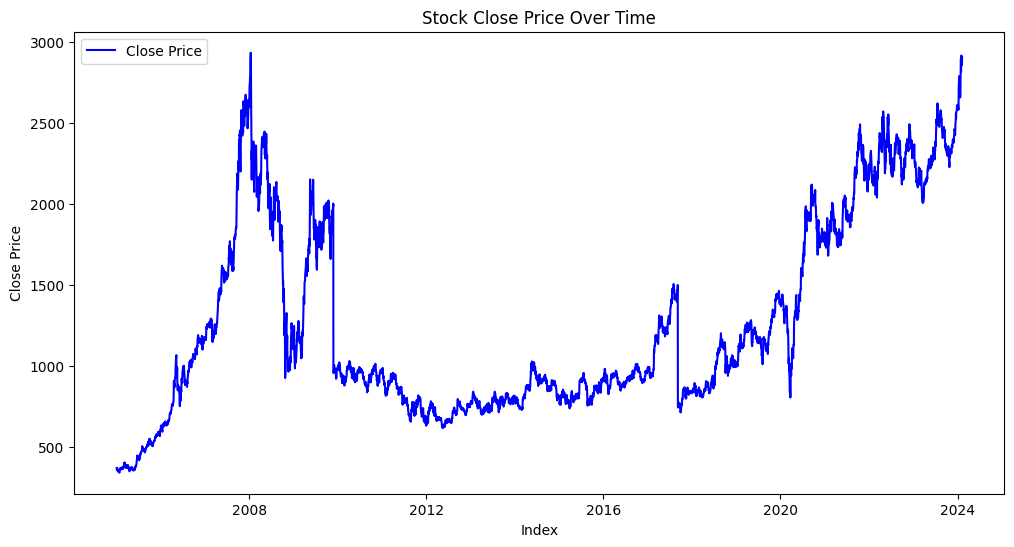

In [8]:
import matplotlib.pyplot as plt

# Plotting the closing prices using numerical index
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['Close'], label='Close Price', color='blue')
plt.title('Stock Close Price Over Time')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()


# Data Analysis

In [15]:
df.describe()

,Open,High,Low,Close,Volume,Market_High_Indicator
count,4708.000000,4708.000000,4708.000000,4708.000000,4.708000e+03,4708.000000
mean,1268.814708,1285.184391,1252.046889,1268.113529,2.981169e+06,0.741079
std,606.678792,614.877593,598.711635,606.803088,2.070018e+07,0.438089
min,344.152500,347.798500,339.518500,341.699200,0.000000e+00,0.000000
25%,823.192300,830.120675,812.287125,822.064225,4.218022e+05,0.000000
50%,989.084250,1002.804200,975.364400,988.058750,8.698080e+05,1.000000
75%,1805.006700,1826.190775,1775.185550,1800.859125,2.540924e+06,1.000000
max,2931.768100,2964.677700,2864.450000,2932.041700,8.021841e+08,1.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4708 entries, 0 to 4707
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Open                   4708 non-null   float64
 1   High                   4708 non-null   float64
 2   Low                    4708 non-null   float64
 3   Close                  4708 non-null   float64
 4   Volume                 4708 non-null   float64
 5   Market_High_Indicator  4708 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 220.8 KB


<ipython-input-10-7cb9daedfff5>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


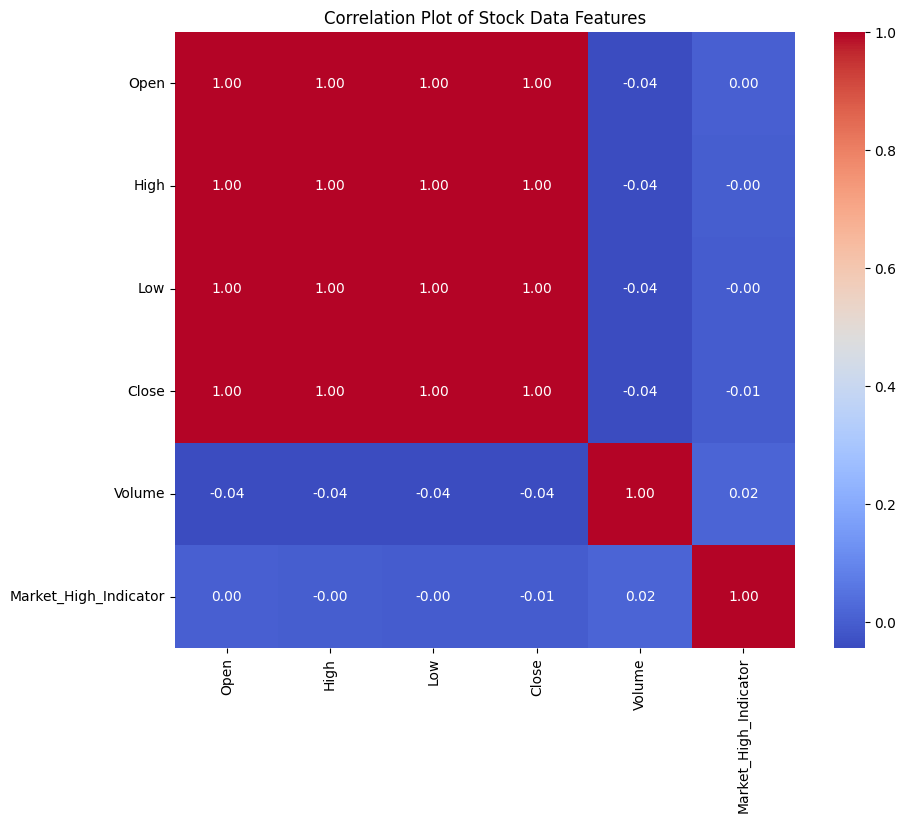

In [10]:
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot of Stock Data Features')
plt.show()


In [11]:
# Drop the 'Date' column from the DataFrame
df = df.drop(columns=['date'])

# Split the data into features (X) and target (y)
X = df.drop(columns=['Market_High_Indicator'])  # Features are all columns except 'Market_High_Indicator'
y = df['Market_High_Indicator']  # Target column is 'Market_High_Indicator'

# Now, you can use X and y for further processing, such as training and testing your model


#Model training

In [12]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df.drop(columns=['Market_High_Indicator'])  # Features are all columns except 'Market_High_Indicator'
y = df['Market_High_Indicator']  # Target column is 'Market_High_Indicator'

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, you can use X_train, X_test, y_train, and y_test for training and evaluating your model

In [13]:
from keras.models import Sequential
from keras.layers import Dense

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
95/95 [==============================] - 3s 9ms/step - loss: 24968.5078 - accuracy: 0.6444 - val_loss: 402.0865 - val_accuracy: 0.6910
Epoch 2/10
95/95 [==============================] - 0s 4ms/step - loss: 13044.3584 - accuracy: 0.6082 - val_loss: 52426.0469 - val_accuracy: 0.7228
Epoch 3/10
95/95 [==============================] - 0s 5ms/step - loss: 18242.8242 - accuracy: 0.6159 - val_loss: 1153.5392 - val_accuracy: 0.7241
Epoch 4/10
95/95 [==============================] - 1s 5ms/step - loss: 22845.8223 - accuracy: 0.6627 - val_loss: 20855.1758 - val_accuracy: 0.2772
Epoch 5/10
95/95 [==============================] - 0s 5ms/step - loss: 3065.2632 - accuracy: 0.6159 - val_loss: 408.8786 - val_accuracy: 0.6711
Epoch 6/10
95/95 [==============================] - 1s 5ms/step - loss: 1336.5710 - accuracy: 0.5966 - val_loss: 4052.6670 - val_accuracy: 0.2772
Epoch 7/10
95/95 [==============================] - 0s 5ms/step - loss: 26528.0137 - accuracy: 0.6574 - val_loss: 1938.0

#Predict next day high

In [14]:
# Predict the next day's market high indicator
last_row_features = df.drop(columns=['Market_High_Indicator']).iloc[-1]
last_row_features = last_row_features.values.reshape(1, -1)
next_day_prediction = model.predict(last_row_features)

# Convert the prediction to binary (0 or 1)
next_day_prediction_binary = 1 if next_day_prediction > 0.5 else 0

print("Predicted Market High Indicator for the Next Day:", next_day_prediction_binary)

1/1 [==============================] - 0s 336ms/step
Predicted Market High Indicator for the Next Day: 1


In [20]:
# from sklearn.linear_model import LogisticRegression

# # Initialize the Logistic Regression model
# model = LogisticRegression()

# # Train the model on the training data
# model.fit(X_train, y_train)

# # Once trained, you can use the model to make predictions on the test data
# y_pred = model.predict(X_test)



In [19]:
# from sklearn.metrics import accuracy_score

# # Calculate accuracy score
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)


In [18]:
# # Extract features from the last row of your dataset
# last_row_features = df.drop(columns=['Market_High_Indicator']).iloc[-1]

# # Reshape the features array as scikit-learn expects a 2D array
# last_row_features = last_row_features.values.reshape(1, -1)

# # Predict the next day's market high indicator
# next_day_prediction = model.predict(last_row_features)

# print("Predicted Market High Indicator for the Next Day:", next_day_prediction[0])


In [17]:
# # Predict the next day's market high indicator
# last_row_features = df.drop(columns=['Market_High_Indicator']).iloc[-1]
# last_row_features = last_row_features.values.reshape(1, -1)
# next_day_prediction = model.predict(last_row_features)

# # Convert the prediction to binary (0 or 1)
# next_day_prediction_binary = 1 if next_day_prediction > 0.5 else 0

# print("Predicted Market High Indicator for the Next Day:", next_day_prediction_binary)
